# Mandatory Assignment 3
By Carlos Reiakvam

In [1]:
from Aco import *
import json
import networkx as nx

#### Import data

In [2]:
with open('graph.json','r') as f:
    graph = json.load(f)

##### Create Aco object (which contains all necessary methods)

In [16]:
aco = Aco(graph)

#### Update pheromone matrix with n ants

In [17]:
n_ants = 3000
aco.update_pheromone_matrix(n_ants)

#### Let an ant show the best path depending on the map of the pheromones

In [18]:
best_path = aco.get_best_path_from_ant()
best_path

['0', '4', '15', '22', '27', '29']

#### Visualizing the results and comparing with dijkstra

In [19]:
G = nx.from_dict_of_dicts(graph)
aco_colors = aco.generate_colors(best_path)
dijkstra_p = nx.dijkstra_path(G, '0', '29', weight='weight', )
pos = nx.spring_layout(G)


##### Visualization of ant colony optimizations best path

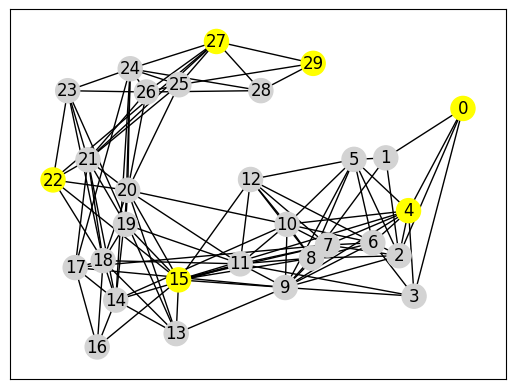

In [20]:
nx.draw_networkx(G, pos, node_color= aco_colors)

##### Visualization of dijkstra's best path

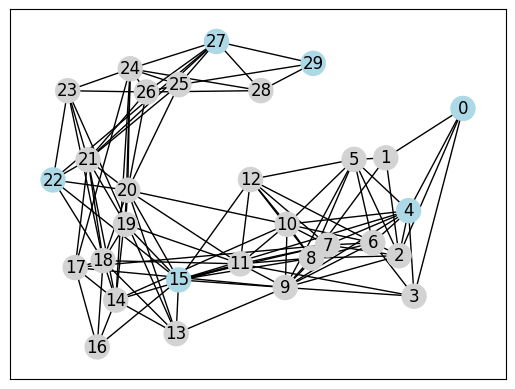

In [21]:
dijkstra_colors = aco.generate_colors(dijkstra_p, 'lightblue')
nx.draw_networkx(G, pos, node_color= dijkstra_colors)